<a href="https://colab.research.google.com/github/kumar-shivang/Rough-Notebook/blob/main/CNN%20trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [52]:
img = tf.io.read_file('./drive/MyDrive/apfel.jpeg')
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.convert_image_dtype(img,dtype=tf.float32)
# img = tf.image.resize(img,size=(512,512))
img = tf.expand_dims(img, axis=0)
print(img.shape)


(1, 1024, 1024, 3)


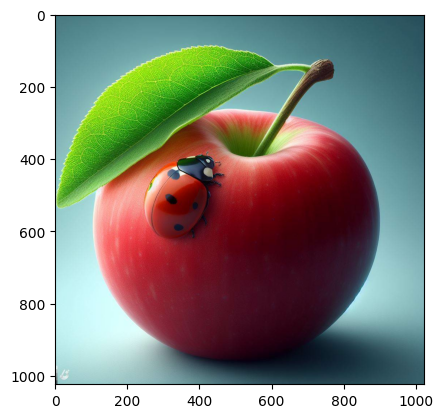

In [53]:
plt.imshow(img[0])

In [54]:
filters = [
    [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],  # Edge Detection (Horizontal)
    [[1, 2, 1], [0, 0, 0], [-1, -2, -1]],  # Edge Detection (Vertical)
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],  # Sharpening
    [[0.1111111111111111, 0.1111111111111111, 0.1111111111111111],
     [0.1111111111111111, 0.1111111111111111, 0.1111111111111111],
     [0.1111111111111111, 0.1111111111111111, 0.1111111111111111]],  # Smoothing (Box Blur)
    [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]],  # Embossing
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]],  # Identity (No Change)
    [[-2, 0, 2], [-4, 0, 4], [-2, 0, 2]],  # Sobel Filter (Horizontal)
    [[2, 4, 2], [0, 0, 0], [-2, -4, -2]],  # Sobel Filter (Vertical)
    [[0, 1, 0], [1, -4, 1], [0, 1, 0]],  # Laplacian of Gaussian (Edge Detection)
    [[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]  # High-Pass Filter
]

filters = tf.constant(filters,dtype=tf.float32)
filters = tf.reshape(filters,[1,3,3,10])
filters.shape

TensorShape([1, 3, 3, 10])

In [55]:
# Apply the filter to the image
cimg = tf.nn.conv2d(img, filters, strides=[1, 2, 2, 1], padding='VALID')

cimg.shape


TensorShape([1, 512, 511, 10])

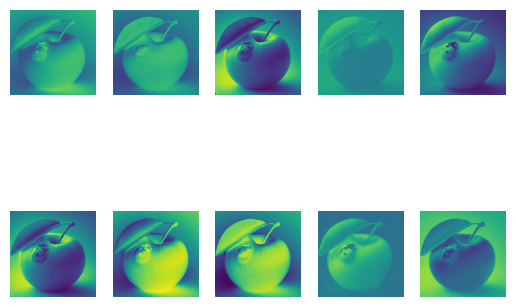

In [56]:
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.imshow(cimg[0,:,:,i])
  plt.axis('off')
plt.show()


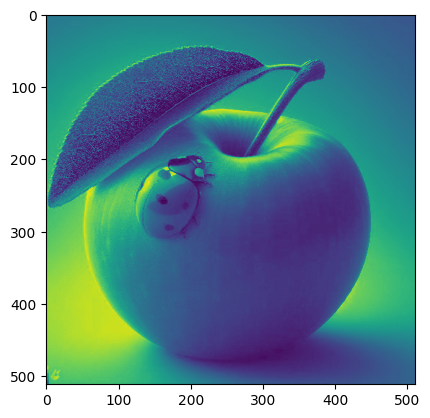

In [57]:
plt.imshow(cimg[0,:,:,2])

In [58]:
pimg = tf.nn.max_pool(cimg, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
pimg.shape


TensorShape([1, 256, 255, 10])

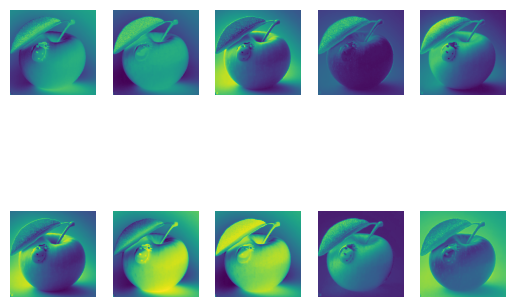

In [59]:
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.imshow(pimg[0,:,:,i])
  plt.axis('off')
plt.show()


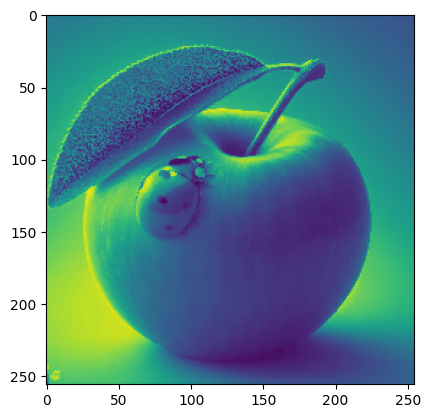

In [60]:
plt.imshow(pimg[0,:,:,2])

In [63]:
padded = image = tf.pad(img, [[0, 0], [0, 100], [0, 101], [0, 0]], mode='CONSTANT')
padded.shape

TensorShape([1, 1124, 1125, 3])

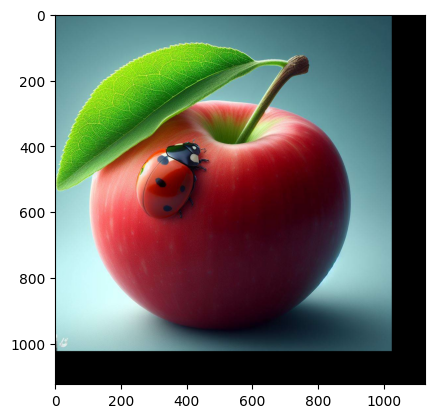

In [64]:
plt.imshow(padded[0])

In [65]:
# Apply the filter to the image
padded_cimg = tf.nn.conv2d(padded, filters, strides=[1, 2,2, 1], padding='VALID')
padded_cimg.shape

TensorShape([1, 562, 562, 10])

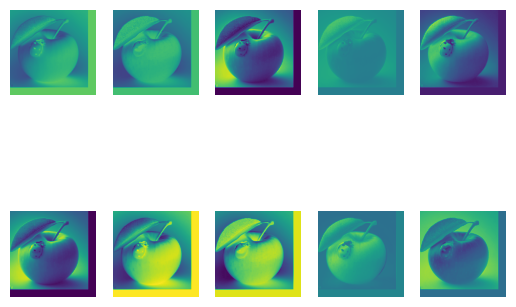

In [66]:
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.imshow(padded_cimg[0,:,:,i])
  plt.axis('off')
plt.show()

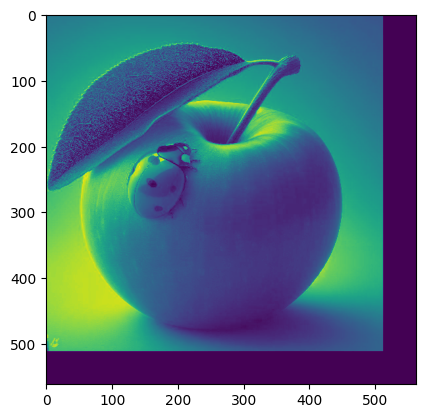

In [67]:
plt.imshow(padded_cimg[0,:,:,2])

In [68]:
padded_pimg = tf.nn.max_pool(padded_cimg, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
padded_pimg.shape

TensorShape([1, 281, 281, 10])

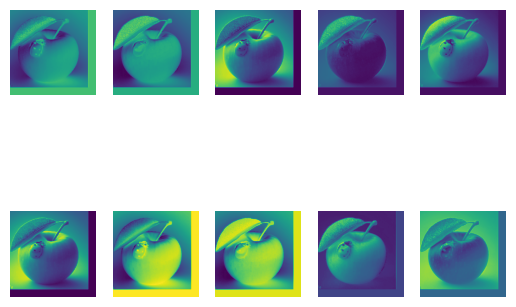

In [69]:
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.imshow(padded_pimg[0,:,:,i])
  plt.axis('off')
plt.show()

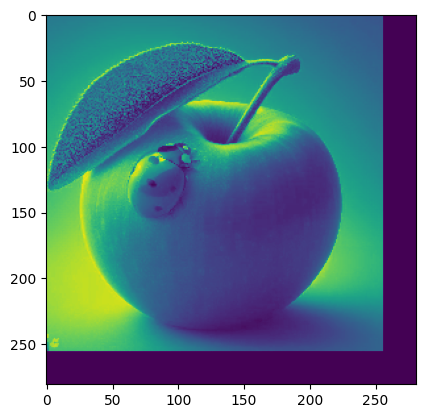

In [70]:
plt.imshow(padded_pimg[0,:,:,2])

In [73]:
fc_layer = tf.keras.layers.Conv2D(filters=100,kernel_size=(256,255),strides=(1,1),padding="VALID")(padded_pimg)
fc_layer.shape

TensorShape([1, 26, 27, 100])

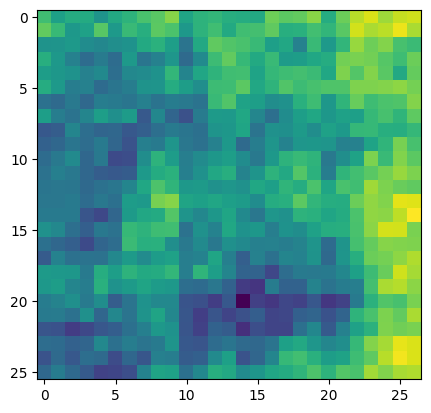

In [81]:
plt.imshow(fc_layer[0,:,:,10])